# PerkinElmer Absorbance Code

In [54]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
from matplotlib import rcParams
import matplotlib.cm as cm
import math
import numpy as np
import pandas as pd
import os

#%matplotlib qt
%matplotlib inline

sample_folder = r'C:\Users\tl457\OneDrive - University Of Cambridge 1\1_Data\McMaster-Nov21-Samples\220107_McMasterNov_Abs'
export_folder = r'C:\Users\tl457\OneDrive - University Of Cambridge 1\1_Data\McMaster-Nov21-Samples\220107_McMasterNov_Abs'

# specify matplotlib configuration file name
plot_config_path = r'C:\Users\tl457\Documents\GitHub\optofluidics\optofluidics\optofluidics'
plot_config_file = 'plotting_params.txt'
dir = os.path.abspath(os.path.dirname(plot_config_path))
rc_fname=os.path.join(dir, plot_config_file)

In [55]:
# display sample names
sample_names=pd.read_csv(os.path.join(sample_folder,"Results Table.csv"),index_col=0)
sample_names.style
for i in sample_names.index:
    print(i)
    sample_names.loc[i,'File']=os.path.join(sample_folder,i+'.Sample.Raw.csv')

# create DataFrame
data=pd.DataFrame()
for i in sample_names.index:
    temp=pd.read_csv(sample_names.loc[i,'File'],index_col=0)
    data[i]=np.concatenate(temp.values).ravel()
data.index=temp.index

S1_LR_WG
S4_WG
S5_LR
S7_Control
S9_LR_WG
S10_LR
S11_WG
S12_Control
Acrylate_211117_LG_WG
Acrylate_210415_LG_WG
S5_LR_repeat


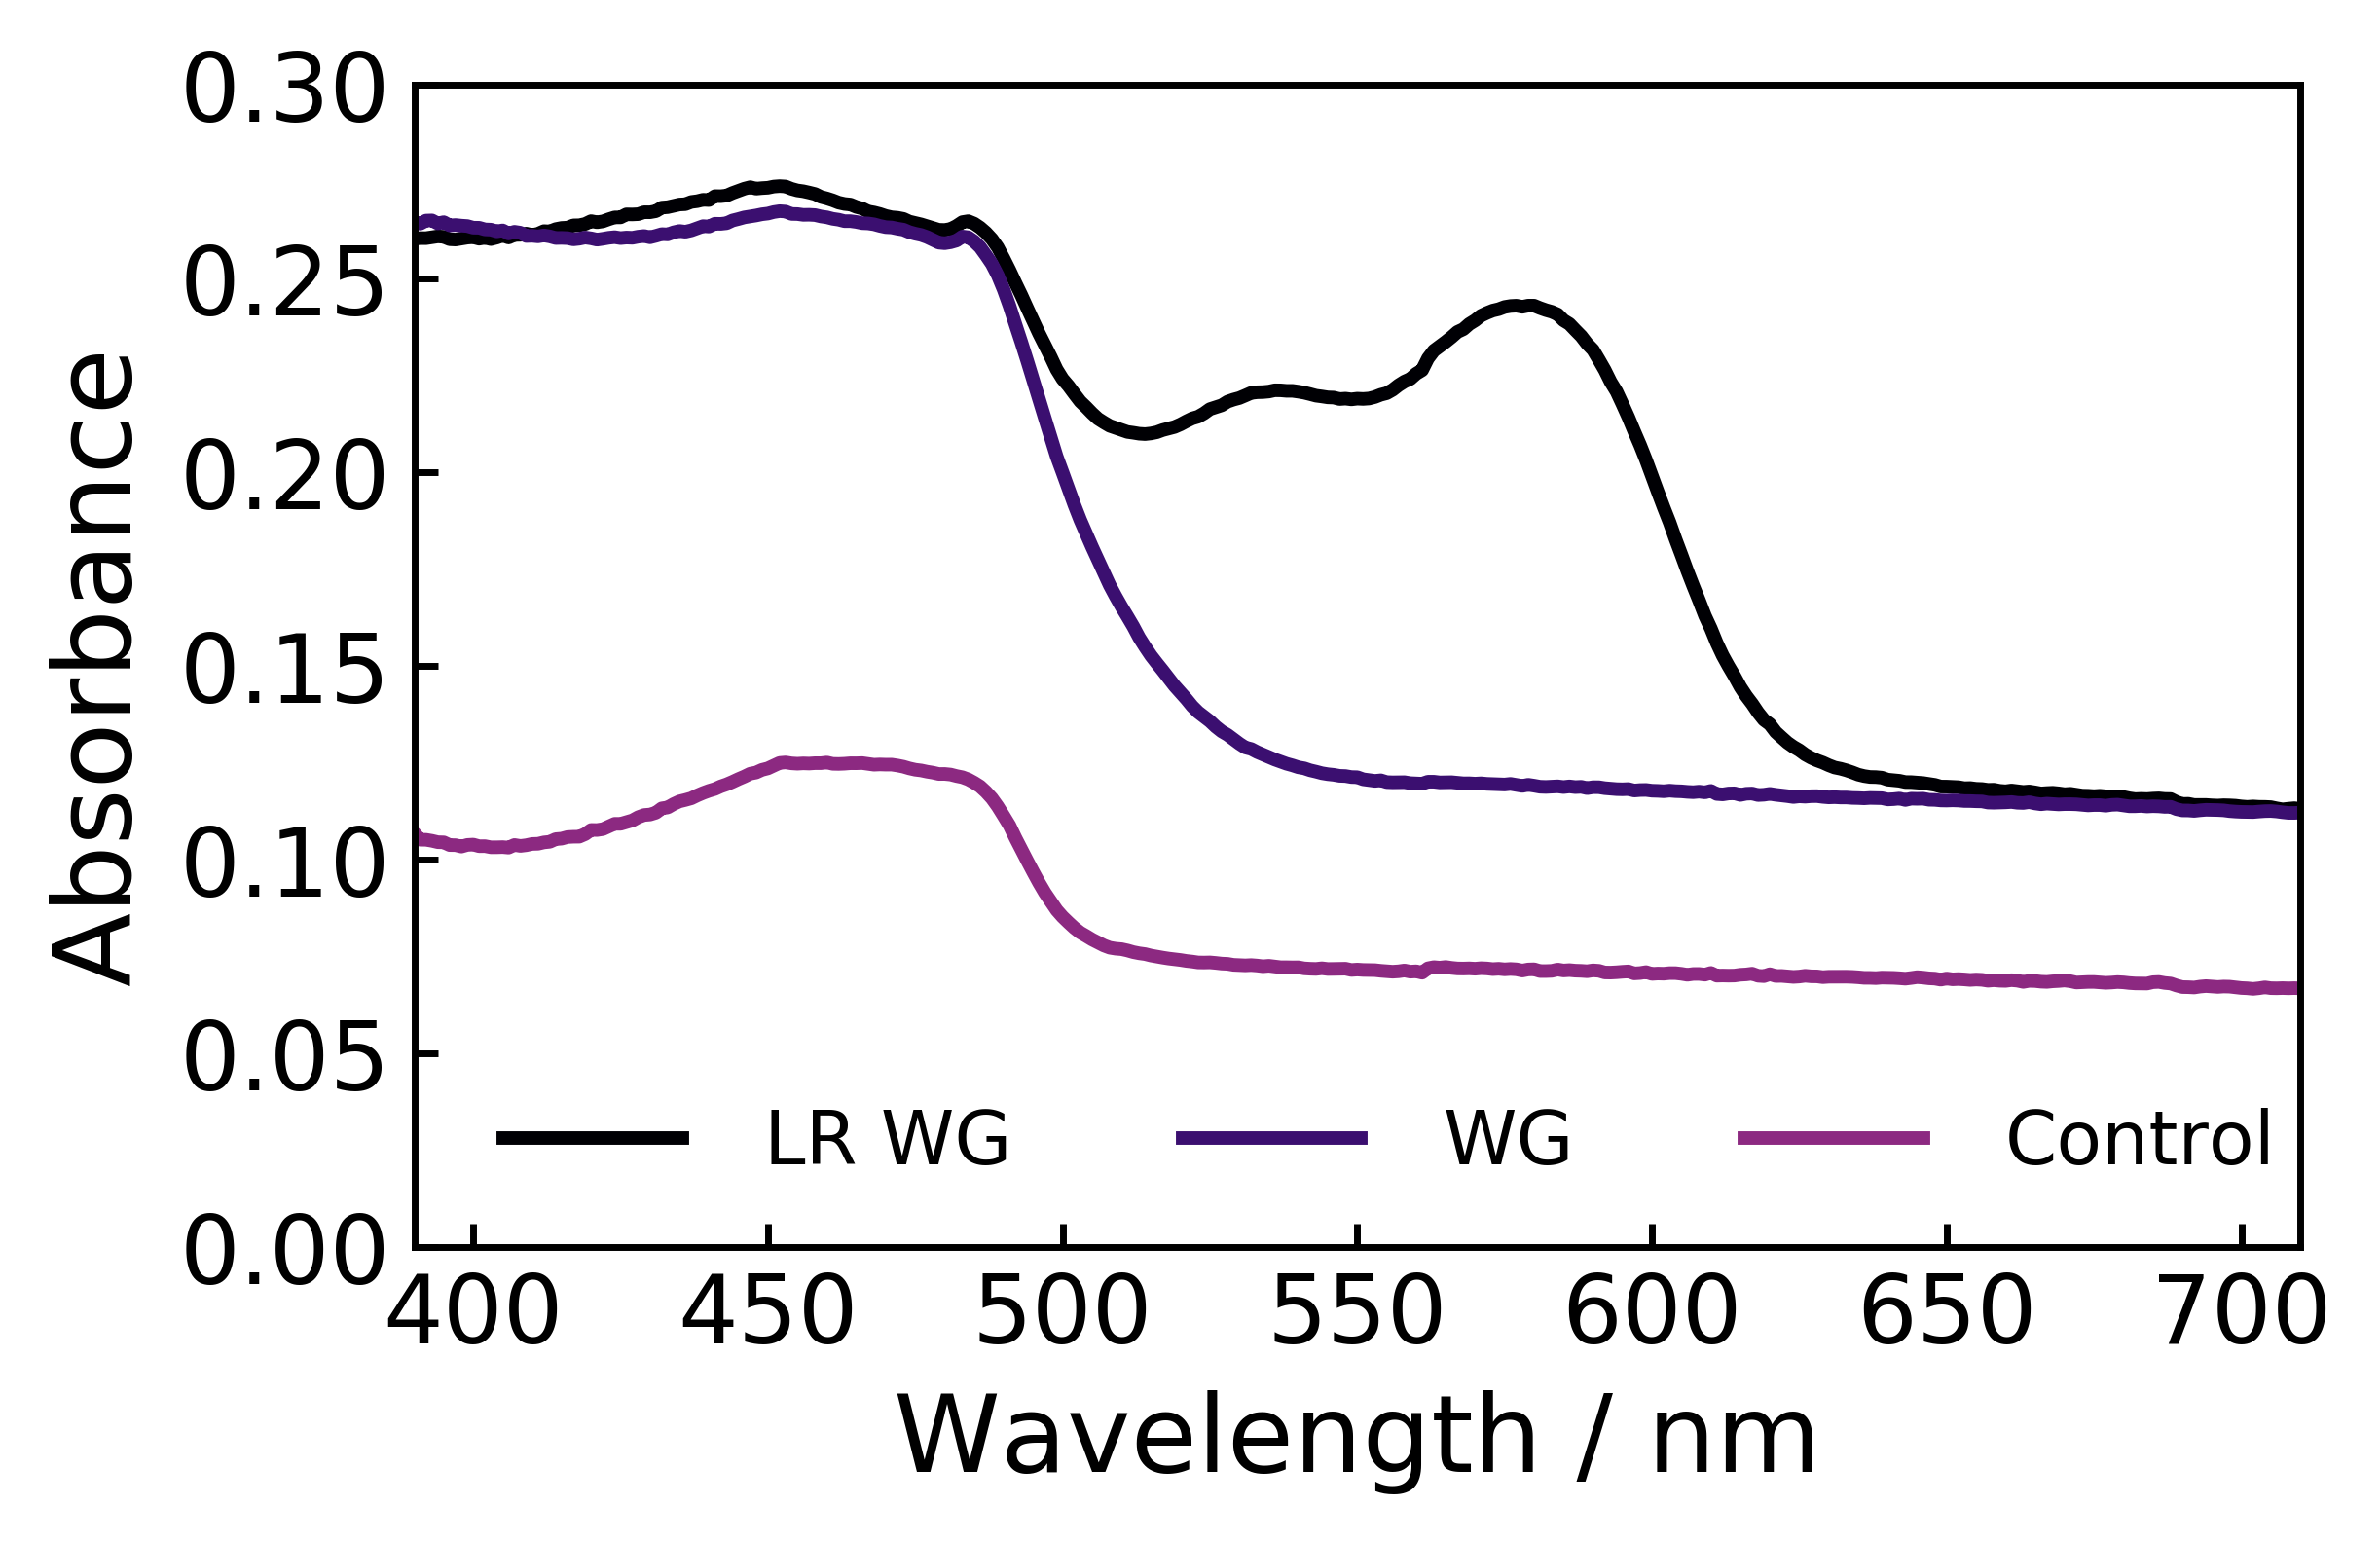

In [84]:
# cividis colour map used for plotting
evenly_spaced_interval = np.linspace(0, 1, len(sample_names.index))
colors = [cm.magma(x) for x in evenly_spaced_interval]

# plot absorbance curves for non-ring cell samples
with rc_context(fname=rc_fname):
    plt.plot(data['S1_LR_WG'],label='LR WG',color=colors[0])
    plt.plot(data['S4_WG'],label='WG',color=colors[2])
    plt.plot(data['S7_Control'],label='Control',color=colors[4])
    plt.xlim(390,710)
    plt.ylim(0,0.3)
    plt.xlabel('Wavelength / nm')
    plt.ylabel('Absorbance')
    plt.legend(ncol=3,fontsize=11)

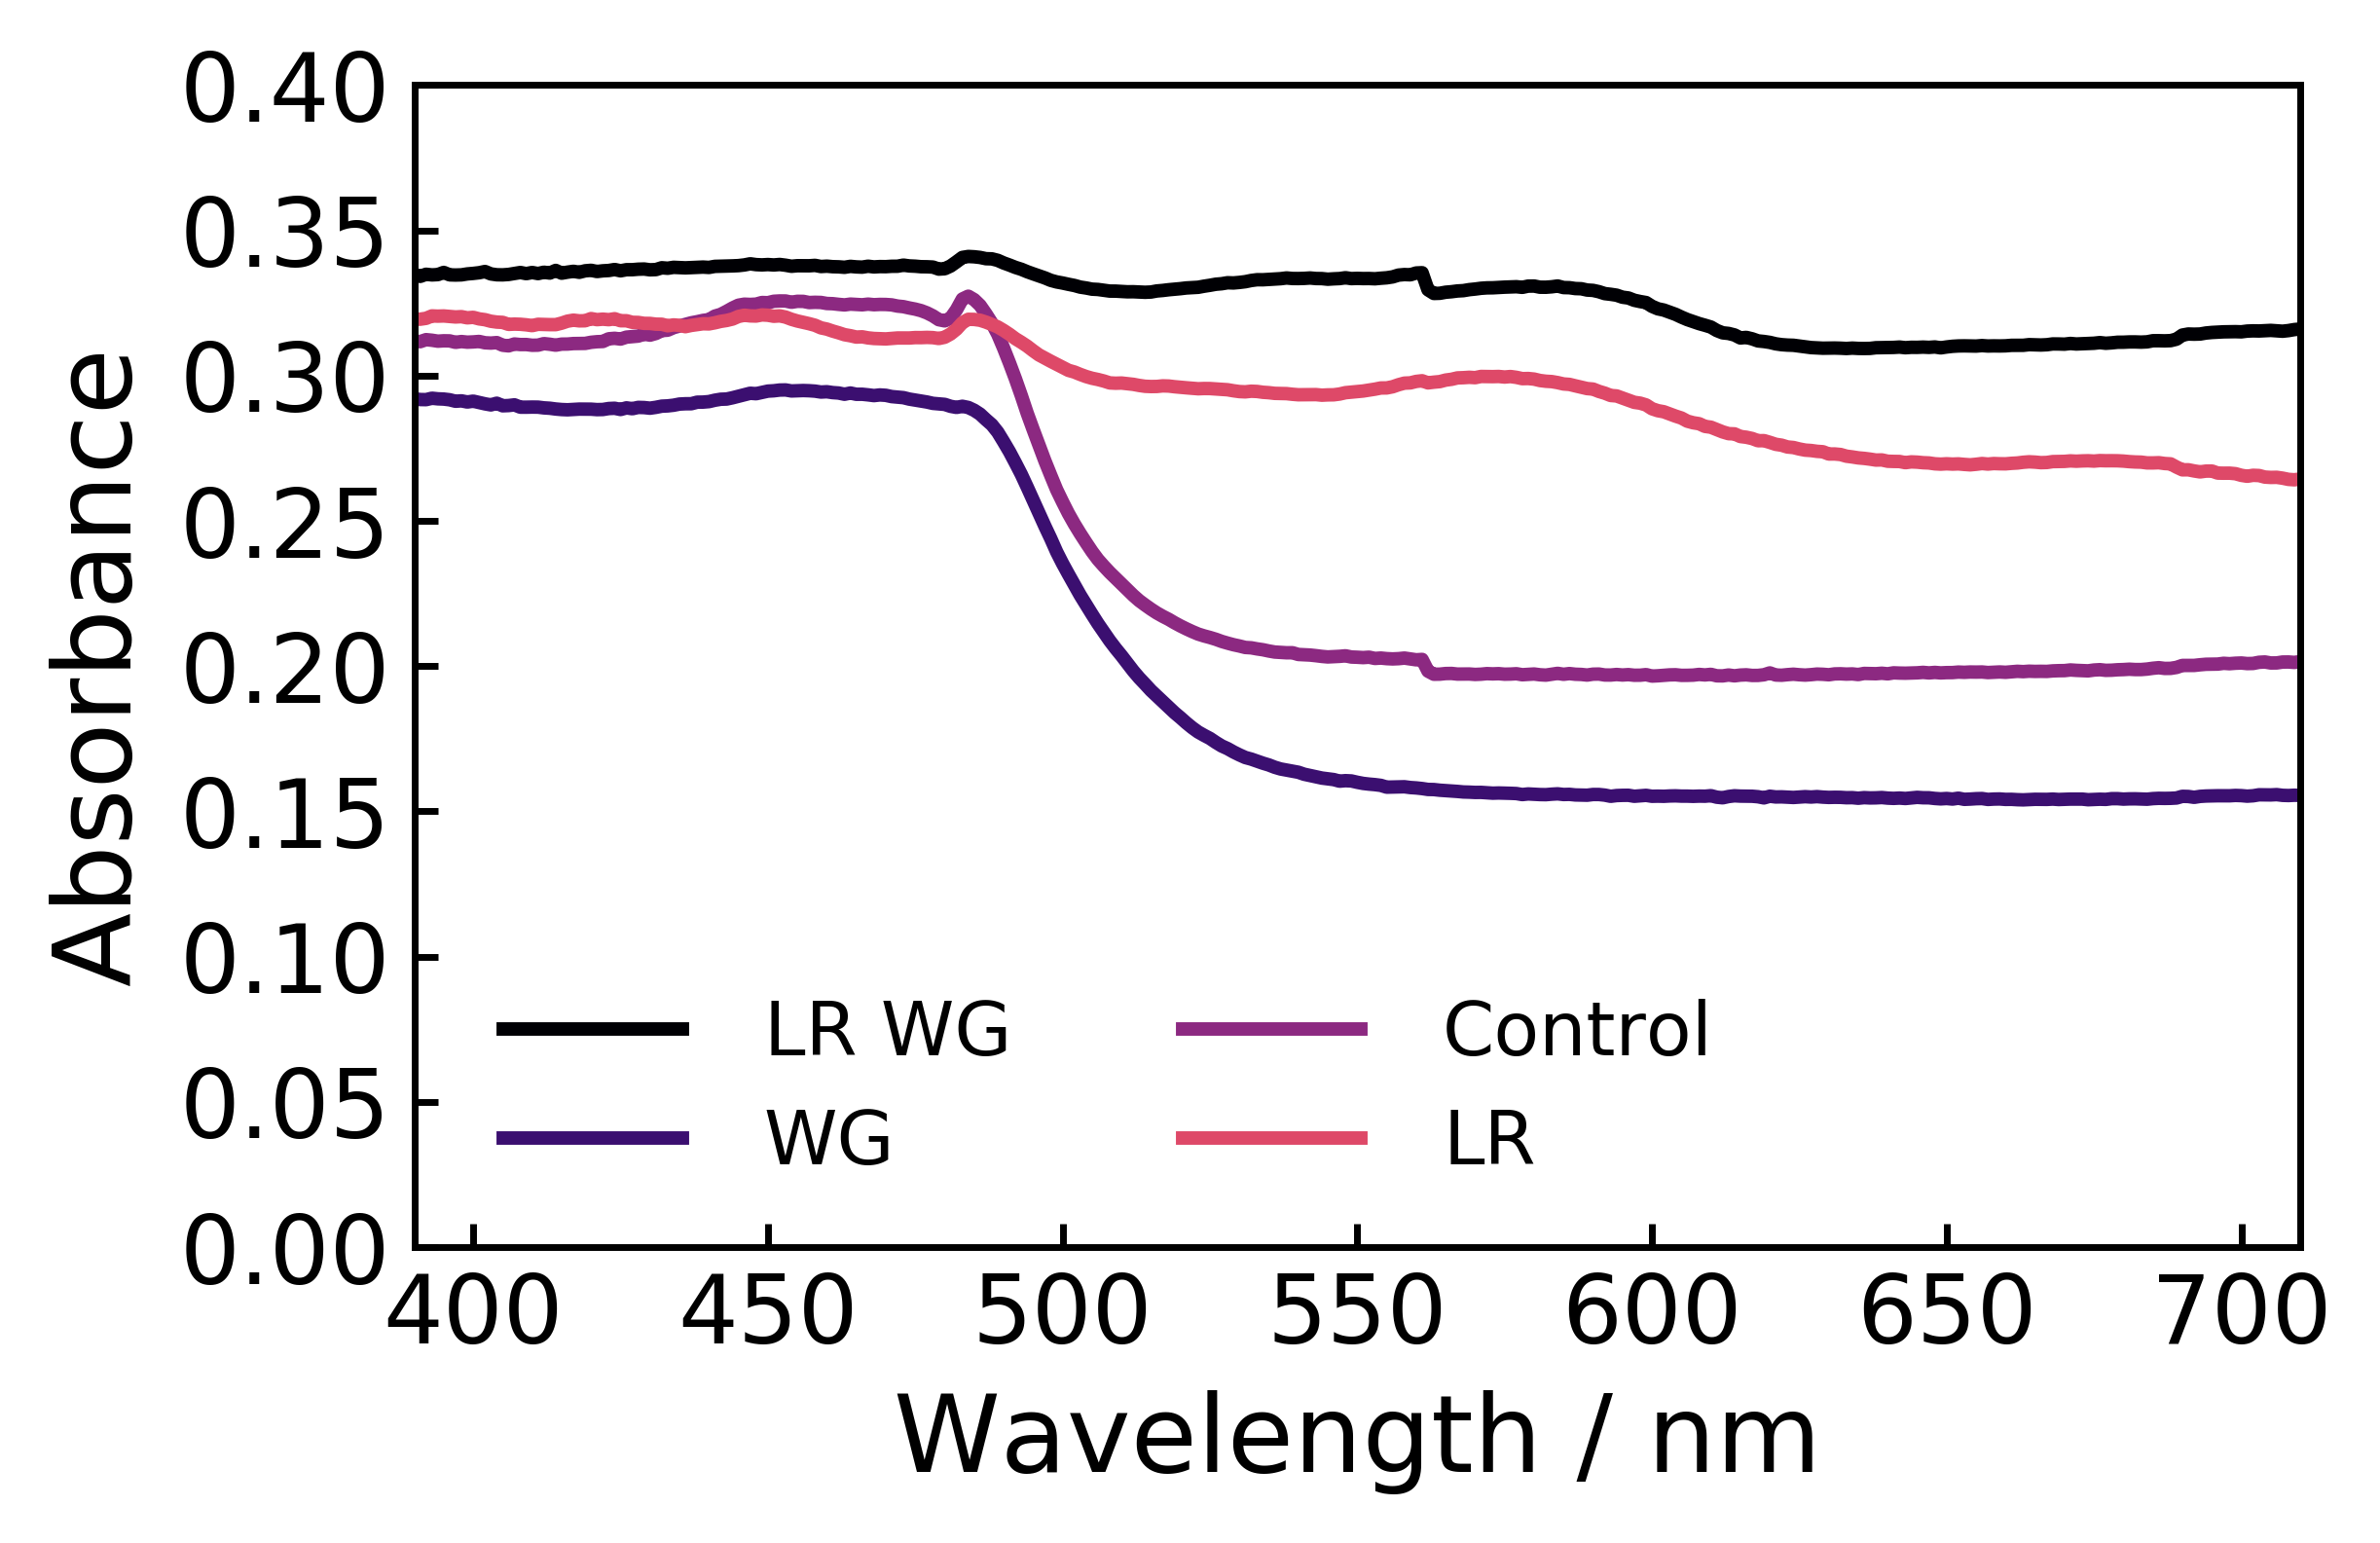

In [92]:
# plot absorbance curves for ring cell samples
with rc_context(fname=rc_fname):
    plt.plot(data['S9_LR_WG'],label='LR WG',color=colors[0])
    plt.plot(data['S11_WG'],label='WG',color=colors[2])
    plt.plot(data['S12_Control'],label='Control',color=colors[4])
    plt.plot(data['S10_LR'],label='LR',color=colors[6])
    plt.xlim(390,710)
    plt.ylim(0.0,0.4)
    plt.xlabel('Wavelength / nm')
    plt.ylabel('Absorbance')
    plt.legend(ncol=2,fontsize=11)

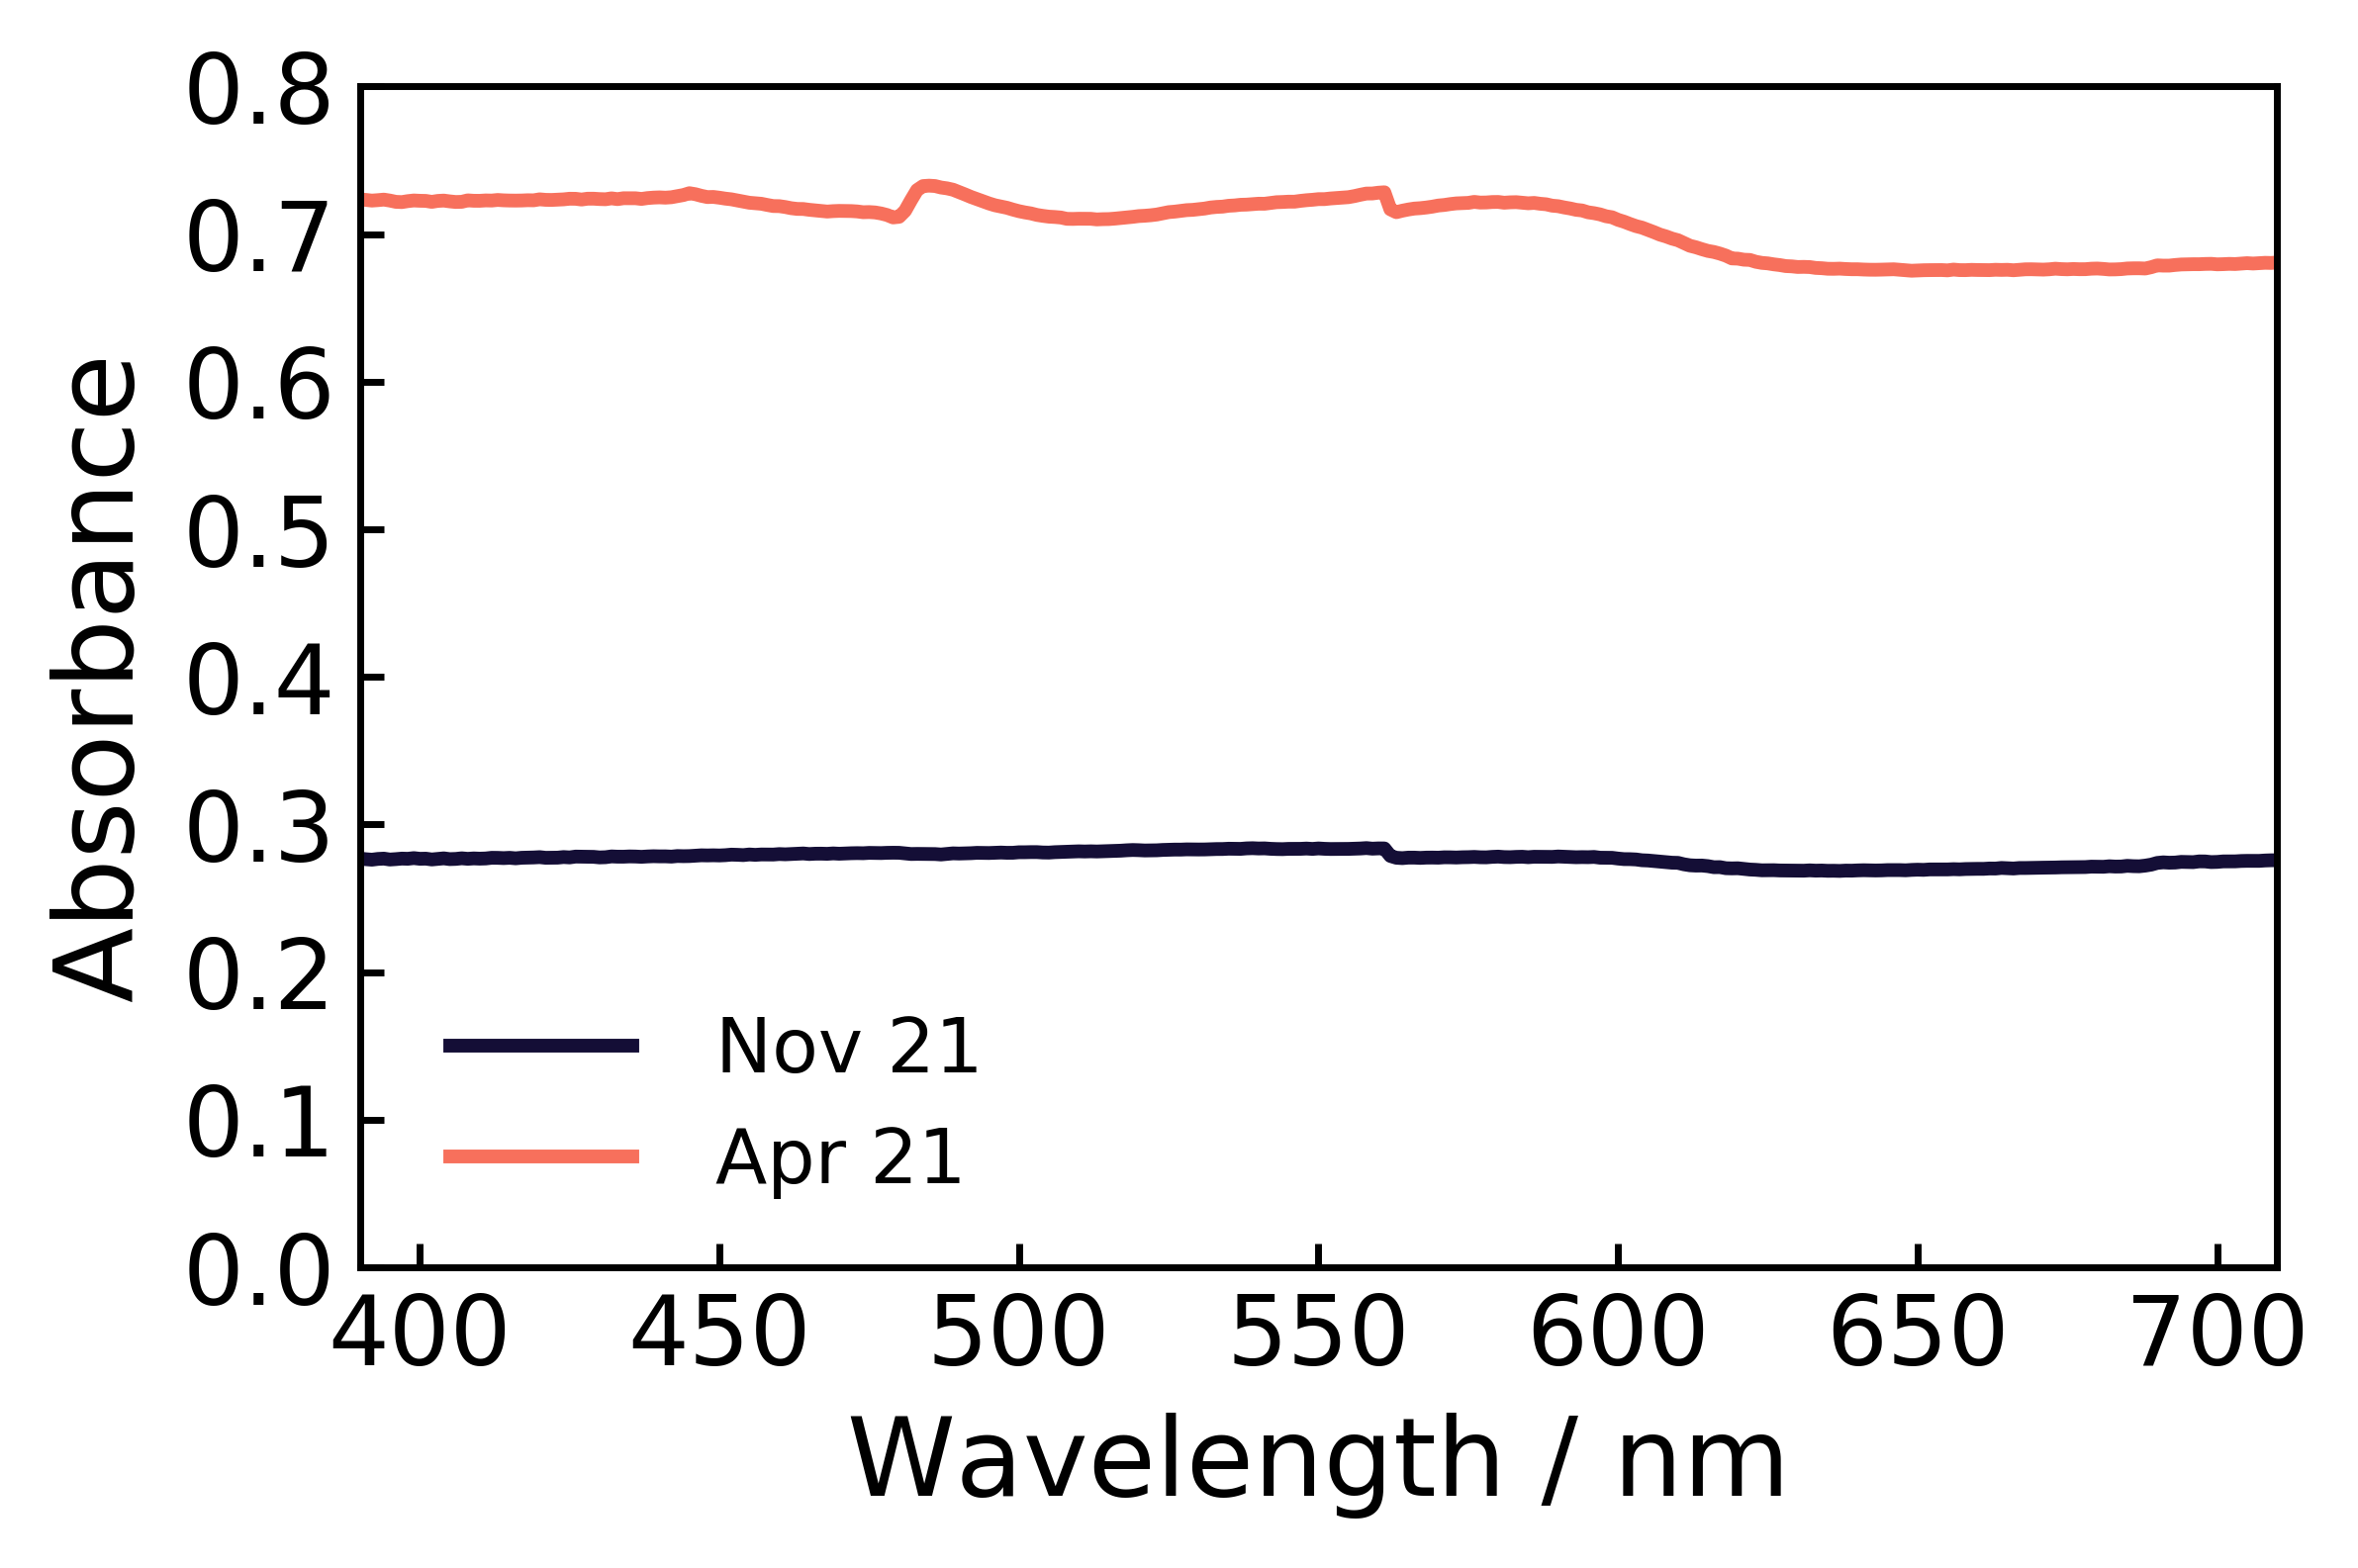

In [99]:
# plot absorbance curves for acrylate samples
with rc_context(fname=rc_fname):
    plt.plot(data['Acrylate_211117_LG_WG'],label='Nov 21',color=colors[1])
    plt.plot(data['Acrylate_210415_LG_WG'],label='Apr 21',color=colors[7])
    plt.xlim(390,710)
    plt.ylim(0,0.8)
    plt.xlabel('Wavelength / nm')
    plt.ylabel('Absorbance')
    plt.legend(ncol=1,fontsize=11)